In [1]:
import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB

from sklearn.model_selection import GridSearchCV

from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.classifier import precision_recall_curve

import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
pd.set_option('display.precision', 3)

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv'
df = pd.read_csv(url)

a) El primer paso es preprocesar y preparar los datos antes de ajustar cualquier modelo. Primero debéis fusionar los ejemplos de todas las clases etiquetadas BloodDonor y ocuparos
de los valores perdidos que existen en el conjunto de datos (imputarlos usando la media
del atributo es suficiente). Descartad cualquier atributo que no sea informativo. Dividid
los datos en conjuntos de entrenamiento y test1
(70 %/30 %) y estandarizad las variables
(calculad el estandarizador a partir de los datos del train y luego aplicadlo a los datos de
test).


In [3]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.shape

(615, 14)

In [5]:
columns = ['Category', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

In [6]:
df = df[columns]

In [7]:
df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [8]:
df['Category'].replace(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'], ['Blood Donor', 'Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], inplace=True)

In [9]:
df.head()

,Category,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Blood Donor,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Blood Donor,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Blood Donor,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Blood Donor,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Blood Donor,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [10]:
df['Category'].unique()

array(['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], dtype=object)

In [16]:
for col in columns:
  print(f'{col} {df[col].isnull().sum()}')

Category 0
ALB 1
ALP 18
ALT 1
AST 0
BIL 0
CHE 0
CHOL 10
CREA 0
GGT 0
PROT 1


In [17]:
data_columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
for col in data_columns:
  df[col].fillna(df[col].mean(), inplace=True)

In [18]:
X = df[data_columns]
y = df['Category']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

b) Aplicad algún método de reducción de dimensionalidad a los datos de entrenamiento y
comentad lo que se pueda apreciar en la visualización. Pensad en qué podéis representar
sobre la transformación.


In [22]:
from sklearn.decomposition import PCA
myPCA = PCA().fit(X_train);

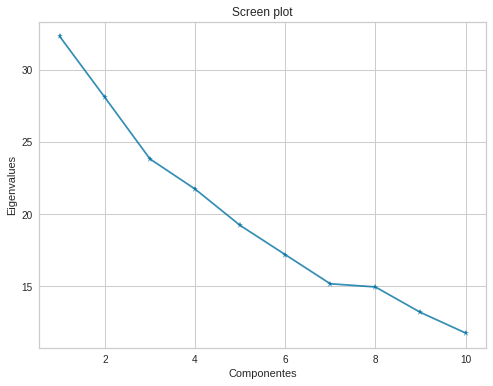

In [28]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.singular_values_) + 1), myPCA.singular_values_, alpha=0.8, marker='*')
y_label = plt.ylabel('Eigenvalues')
x_label = plt.xlabel('Componentes')
plt.title('Screen plot')
plt.show()

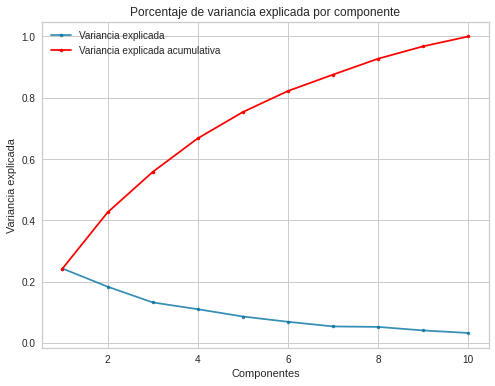

In [30]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.explained_variance_ratio_) + 1), myPCA.explained_variance_ratio_, alpha=0.8, marker='.', label="Variancia explicada")
y_label = plt.ylabel('Variancia explicada')
x_label = plt.xlabel('Componentes')
plt.plot(range(1,len(myPCA.explained_variance_ratio_) + 1), np.cumsum(myPCA.explained_variance_ratio_), c='red',marker='.', label="Variancia explicada acumulativa")
plt.legend()
plt.title('Porcentaje de variancia explicada por componente')
plt.show()

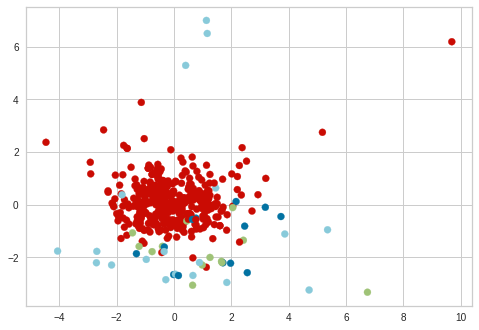

In [33]:
colors = y_train.copy()
colors.replace(['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], ['r', 'g', 'b', 'c'], inplace=True)
plt.scatter(myPCA.transform(X_train)[:,1], myPCA.transform(X_train)[:,2], c=colors)
plt.show()

Podemos apreciar que la varianza explicada está muy repartida entre los componentes. En la visualización de individuos, se puede apreciar un área densa de posibles donantes de sangre, y cómo estos son fácilmente separables, mientras que las clases minoritarias están más disipadas.

c) Nuestro modelo base habitual para la clasificación será Naïve Bayes (Gaussiano). Calculad
el error de validación cruzada, mirad el informe de clasificación sobre el test y representad
su matriz de confusión.


In [34]:
print(np.mean(cross_val_score(GaussianNB(), X_train, y_train, cv=10)))

0.9186046511627908


In [36]:
gnb_model = GaussianNB().fit(X_train, y_train)

print(f'Priors: {gnb_model.class_prior_}')

Priors: [0.89302326 0.04418605 0.03023256 0.03255814]


In [ ]:
print(classification_report(gnb_model.predict(X_test), y_test, target_names=['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']))

              precision    recall  f1-score   support

 Blood Donor       0.96      0.94      0.95       158
   Hepatitis       0.55      0.60      0.57        10
    Fibrosis       0.38      0.30      0.33        10
   Cirrhosis       0.20      0.29      0.24         7

    accuracy                           0.86       185
   macro avg       0.52      0.53      0.52       185
weighted avg       0.87      0.86      0.87       185



d) Ajustad un discriminante lineal (LDA) y una regresión logística a los datos. ¿Son estos
modelos mejores que Naïve Bayes? No os limitéis a comparar sus aciertos, ¿son mejores
sus resultados en las clases minoritarias?


In [38]:
print(np.mean(cross_val_score(LinearDiscriminantAnalysis(), X_train, y_train, cv=10)))

0.9372093023255814


In [41]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)
print(classification_report(lda_model.predict(X_test), y_test, target_names=['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']))

              precision    recall  f1-score   support

 Blood Donor       0.99      0.91      0.95       170
   Hepatitis       0.27      1.00      0.43         3
    Fibrosis       0.25      0.40      0.31         5
   Cirrhosis       0.30      0.43      0.35         7

    accuracy                           0.88       185
   macro avg       0.45      0.69      0.51       185
weighted avg       0.94      0.88      0.90       185



In [44]:
print(np.mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=10)))

0.9325581395348838


In [45]:
logr_model = LogisticRegression().fit(X_train, y_train)
print(classification_report(logr_model.predict(X_test), y_test,target_names=['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']))

              precision    recall  f1-score   support

 Blood Donor       0.99      0.92      0.96       168
   Hepatitis       0.45      0.71      0.56         7
    Fibrosis       0.25      0.50      0.33         4
   Cirrhosis       0.40      0.67      0.50         6

    accuracy                           0.90       185
   macro avg       0.52      0.70      0.59       185
weighted avg       0.94      0.90      0.91       185



Observamos que tanto con el discriminante lineal como con la regresión logística la calidad de las predicciones aumenta ligeramente. Sin embargo, la media armónica ponderada f1-score no varía sustancialmente con ningún modelo. En resumen, tanto puntuación general como la de las clases minoritarias son mejores con estos modelos que aplicando Gaussian Naive Bayes.

e) La minimización de riesgos vecinales (Vicinal Risk Minimization) es un enfoque alternativo a la minimización del riesgo (en clase hablamos sobre la minimización empírica del
riesgo) que establece que podemos abordar el aprendizaje utilizando una estimación de la
densidad alrededor de los ejemplos. Esto puede verse como una técnica de aumento de datos (básicamente inventamos datos). Suponiendo que la densidad alrededor de un ejemplo
es gaussiana, podemos añadir nuevos ejemplos a nuestro conjunto de datos agregándoles
ruido gaussiano.
Muestread los datos de entrenamiento con reemplazo 500 y 1000 ejemplos de las
tres clases minoritarias y agregad a cada uno ruido gaussiano con varianza 0.1 y 0.01
(tendréis un total de cuatro conjuntos de datos)
Ajustad un discriminante lineal (LDA) y una regresión logística a estos conjuntos de
datos
¿Ha habido alguna mejora en los resultados? ¿Cuál creéis que es el efecto de estos datos
adicionales en los clasificadores? Pensad en lo que calculan los modelos y lo que está
cambiando al agregar estos nuevos datos.

In [111]:
var01 = 0.1
var001 = 0.01

X_train_cp = X_train.copy()
minorities = X_train_cp[y_train != 'Blood Donor']

In [112]:
ds500_01 = minorities.copy()
y500_01 = y_train[y_train != 'Blood Donor'].values.copy()
n = len(ds500_01)

In [113]:
y500_01

array(['Hepatitis', 'Cirrhosis', 'Hepatitis', 'Cirrhosis', 'Fibrosis',
       'Fibrosis', 'Hepatitis', 'Cirrhosis', 'Cirrhosis', 'Cirrhosis',
       'Hepatitis', 'Cirrhosis', 'Cirrhosis', 'Cirrhosis', 'Cirrhosis',
       'Cirrhosis', 'Fibrosis', 'Fibrosis', 'Hepatitis', 'Fibrosis',
       'Hepatitis', 'Hepatitis', 'Hepatitis', 'Hepatitis', 'Cirrhosis',
       'Fibrosis', 'Cirrhosis', 'Fibrosis', 'Hepatitis', 'Cirrhosis',
       'Fibrosis', 'Hepatitis', 'Fibrosis', 'Fibrosis', 'Hepatitis',
       'Cirrhosis', 'Cirrhosis', 'Cirrhosis', 'Cirrhosis', 'Fibrosis',
       'Fibrosis', 'Cirrhosis', 'Cirrhosis', 'Fibrosis', 'Hepatitis',
       'Hepatitis'], dtype=object)

In [114]:
for i in range(0,500):
  index = np.random.randint(0, n)
  fila = [[]]
  fila[0] = ds500_01[index] + np.random.normal(0, np.sqrt(var01), 1)
  y500_01 = np.append(y500_01,  y500_01[index])
  ds500_01 = np.append(ds500_01, fila, axis=0)


In [115]:
print(f'{ds500_01.shape} {y500_01.shape}')

(546, 10) (546,)


In [116]:
ds1000_01 = minorities.copy()
y1000_01 = y_train[y_train != 'Blood Donor'].values.copy()
n = len(ds1000_01)

In [118]:
for i in range(0,1000):
  index = np.random.randint(0, n)
  fila = [[]]
  fila[0] = ds1000_01[index] + np.random.normal(0, np.sqrt(var01), 1)
  y1000_01 = np.append(y1000_01, y1000_01[index])
  ds1000_01 = np.append(ds1000_01, fila, axis=0)

In [119]:
print(f'{ds1000_01.shape} {y1000_01.shape}')

(2046, 10) (2046,)


In [120]:
ds500_001 = minorities.copy()
y500_001 = y_train[y_train != 'Blood Donor'].values.copy()
n = len(ds500_001)

In [122]:
for i in range(0,500):
  index = np.random.randint(0, n)
  fila = [[]]
  fila[0] = ds500_001[index] + np.random.normal(0, np.sqrt(var001), 1)
  y500_001 = np.append(y500_001, y500_001[index])
  ds500_001 = np.append(ds500_001, fila, axis=0)

In [123]:
print(f'{ds500_001.shape} {y500_001.shape}')

(1046, 10) (1046,)


In [124]:
ds1000_001 = minorities.copy()
y1000_001 = y_train[y_train != 'Blood Donor'].values.copy()
n = len(ds1000_001)

In [126]:
for i in range(0,1000):
  index = np.random.randint(0, n)
  fila = [[]]
  fila[0] = ds1000_001[index] + np.random.normal(0, np.sqrt(var001), 1)
  y1000_001 = np.append(y1000_001, y1000_001[index])
  ds1000_001 = np.append(ds1000_001, fila, axis=0)

In [127]:
print(f'{ds1000_001.shape} {y1000_001.shape}')

(2046, 10) (2046,)


In [128]:
ds500_01 = np.append(ds500_01, X_train_cp[y_train == 'Blood Donor'], axis=0)
y500_01 = np.append(y500_01, y_train[y_train == 'Blood Donor'], axis=0)

In [129]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda, ds500_01, y500_01, cv=10)))

0.7440860215053764


In [130]:
lda_model = GaussianNB().fit(ds500_01, y500_01)
print(classification_report(lda_model.predict(X_test), y_test,target_names=['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']))

              precision    recall  f1-score   support

 Blood Donor       0.94      0.95      0.95       154
   Hepatitis       0.64      0.64      0.64        11
    Fibrosis       0.38      0.25      0.30        12
   Cirrhosis       0.30      0.38      0.33         8

    accuracy                           0.86       185
   macro avg       0.56      0.55      0.55       185
weighted avg       0.86      0.86      0.86       185



In [131]:
ds1000_01 = np.append(ds1000_01, X_train_cp[y_train == 'Blood Donor'], axis=0)
y1000_01 = np.append(y1000_01, y_train[y_train == 'Blood Donor'], axis=0)

In [132]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda, ds1000_01, y1000_01, cv=10)))

0.7300411522633744


In [133]:
lda_model = GaussianNB().fit(ds1000_01, y1000_01)
print(classification_report(lda_model.predict(X_test), y_test, target_names=['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']))

              precision    recall  f1-score   support

 Blood Donor       0.92      0.97      0.94       149
   Hepatitis       0.55      0.60      0.57        10
    Fibrosis       0.38      0.19      0.25        16
   Cirrhosis       0.20      0.20      0.20        10

    accuracy                           0.84       185
   macro avg       0.51      0.49      0.49       185
weighted avg       0.82      0.84      0.82       185



In [134]:
ds500_001 = np.append(ds500_001, X_train_cp[y_train == 'Blood Donor'], axis=0)
y500_001 = np.append(y500_001, y_train[y_train == 'Blood Donor'], axis=0)

In [135]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda, ds500_001, y500_001, cv=10)))

0.7657342657342656


In [136]:
lda_model = GaussianNB().fit(ds500_001, y500_001)
print(classification_report(lda_model.predict(X_test), y_test, target_names=['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']))

              precision    recall  f1-score   support

 Blood Donor       0.94      0.95      0.94       153
   Hepatitis       0.64      0.64      0.64        11
    Fibrosis       0.38      0.27      0.32        11
   Cirrhosis       0.30      0.30      0.30        10

    accuracy                           0.86       185
   macro avg       0.56      0.54      0.55       185
weighted avg       0.85      0.86      0.85       185



In [137]:
ds1000_001 = np.append(ds1000_001, X_train_cp[y_train == 'Blood Donor'], axis=0)
y1000_001 = np.append(y1000_001, y_train[y_train == 'Blood Donor'], axis=0)

In [138]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda, ds1000_001, y1000_001, cv=10)))

0.7065843621399177


In [139]:
lda_model = GaussianNB().fit(ds1000_001, y1000_001)
print(classification_report(lda_model.predict(X_test), y_test,target_names=['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']))

              precision    recall  f1-score   support

 Blood Donor       0.92      0.98      0.95       147
   Hepatitis       0.64      0.64      0.64        11
    Fibrosis       0.62      0.29      0.40        17
   Cirrhosis       0.20      0.20      0.20        10

    accuracy                           0.85       185
   macro avg       0.60      0.53      0.55       185
weighted avg       0.84      0.85      0.84       185



Utilizando Vicinal Risk Minimization podemos observar que, aunque la puntuación general de los modelos es menor, en general la puntuación de las clases minoritarias está más equilibrada.

f) Una alternativa al aumento de datos para algunos clasificadores es asignar diferentes pesos
a las clases o ejemplos. El modelo de regresión logística tiene un parámetro class_weight
donde una de las opciones es balanced. Eso ponderará las clases según sus frecuencias.
Ajustad una regresión logística con este parámetro y comparad los resultados con los anteriores.


In [140]:
logr = LogisticRegression(class_weight = 'balanced')
print(np.mean(cross_val_score(logr,X_train,y_train,cv=10)))

0.8674418604651162


In [141]:
logr_model = LogisticRegression(class_weight = 'balanced').fit(X_train, y_train)
print(classification_report(logr_model.predict(X_test), y_test,target_names=['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']))

              precision    recall  f1-score   support

 Blood Donor       0.87      0.98      0.92       139
   Hepatitis       0.45      0.56      0.50         9
    Fibrosis       0.38      0.18      0.24        17
   Cirrhosis       0.50      0.25      0.33        20

    accuracy                           0.81       185
   macro avg       0.55      0.49      0.50       185
weighted avg       0.77      0.81      0.78       185



La logistic regression con pesos parece ser la mejor opción para conseguir accuracy equilibrada entre todas las clases objetivo.